In [ ]:
!pip install kaggle




In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'haoranfei123'
os.environ['KAGGLE_KEY'] = '1caa55312ab35b52fc0ea4ed285f3000'

In [ ]:

!kaggle competitions download -c digit-recognizer

  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 408MB/s]


In [ ]:
!kaggle competitions list -s digit
!pip install kaggle
import os

os.environ['KAGGLE_USERNAME'] = 'haoranfei123'
os.environ['KAGGLE_KEY'] = '1caa55312ab35b52fc0ea4ed285f3000'

!kaggle competitions download -c digit-recognizer

!unzip digit-recognizer.zip



ref                                                                   deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/physionet-ecg-image-digitization  2026-01-22 23:59:00  Research         50,000 Usd        328           False  
https://www.kaggle.com/competitions/digit-recognizer                  2030-01-01 00:00:00  Getting Started   Knowledge        958           False  
https://www.kaggle.com/competitions/digit-recognizer-privat           2030-12-31 23:59:00  Community             Kudos         49           False  
https://www.kaggle.com/competitions/introml2019-3                     2049-11-17 23:59:00  Community             Kudos         40           False  
https://www.kaggle.com/competitions/recognize-digits                  2026-05-15 22:30:00  Community            

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Basic info
print(train.shape)  # (42000, 785)
print(test.shape)   # (28000, 784)
print(train.head())


(42000, 785)
(28000, 784)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0   

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

/tmp/ipython-input-2268130599.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train, palette='viridis')


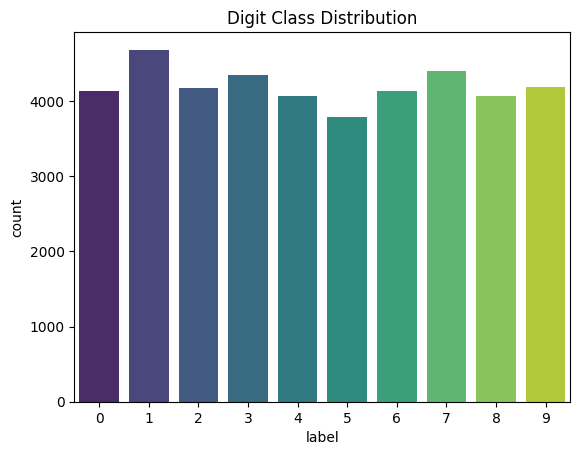

In [ ]:
# Statistical summary
print(train.describe())

# Check for missing values
print(train.isnull().sum().sum(), "missing values in train.csv")
print(test.isnull().sum().sum(), "missing values in test.csv")

# Class distribution
sns.countplot(x='label', data=train, palette='viridis')
plt.title("Digit Class Distribution")
plt.show()


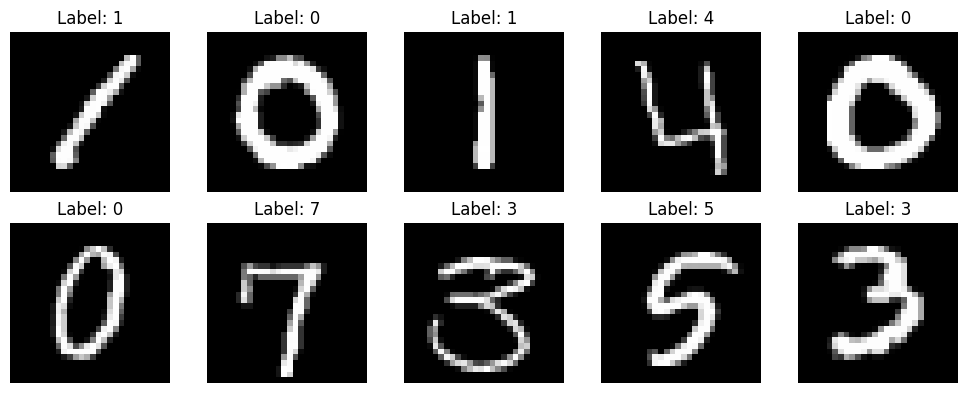

In [ ]:
# Visualize 10 random digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    pixels = train.iloc[i,1:].values.reshape(28,28)
    plt.imshow(pixels, cmap='gray')
    plt.title(f"Label: {train.iloc[i,0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


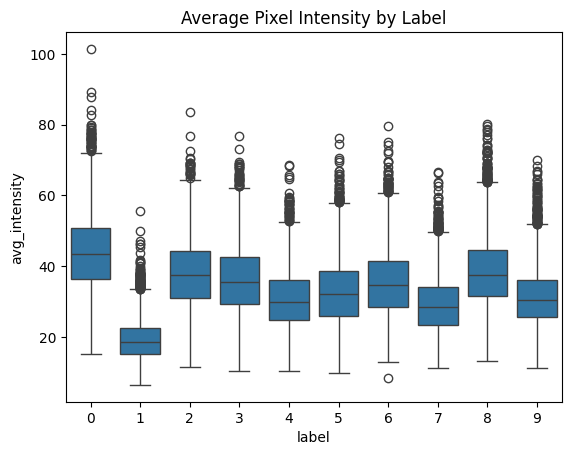

In [ ]:
# Compute average intensity per image and check correlation with label
train['avg_intensity'] = train.iloc[:,1:].mean(axis=1)
sns.boxplot(x='label', y='avg_intensity', data=train)
plt.title("Average Pixel Intensity by Label")
plt.show()

train.drop(columns='avg_intensity', inplace=True)


Model Design •
Propose a simple feedforward neural network architecture.

• Specify the number of layers, neurons per layer, activation functions, and output layer design.
 I want to use Neural Network with 3 hidden layers, the first one is abstract each 2*2 squares, the second one is abstract 4*4 squares, the third one is whole picture, the activation function... I thought sigmoid is a great one. Because Sigmoid summarized the pixel information with a logical function and it ranges from 0-1 just as pixel information in bit is 0 or 1. Output layer should based on output of 3rd layer to generate prediction of num

 • Justify your design choices.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(196, activation='sigmoid'),   # 2x2 abstraction
    Dense(49, activation='sigmoid'),    # 4x4 abstraction
    Dense(16, activation='sigmoid'),    # global features
    Dense(10, activation='softmax')     # 10 output classes (digits)
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 196)            │       153,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 49)             │         9,653 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,483 (642.51 KB)

 Trainable params: 164,483 (642.51 KB)

 Non-trainable params: 0 (0.00 B)

Training & Validation

• Split dataset into training (60%), validation (20%), and test (20%) sets.
1

• Train your neural network.

• Plot training, validation, and test losses across epochs

Train: (25200, 784) Validation: (8400, 784) Test: (8400, 784)
Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2731 - loss: 2.1835 - val_accuracy: 0.6776 - val_loss: 1.4457
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7239 - loss: 1.2689 - val_accuracy: 0.8342 - val_loss: 0.8470
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8530 - loss: 0.7611 - val_accuracy: 0.8899 - val_loss: 0.5753
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9045 - loss: 0.5254 - val_accuracy: 0.9173 - val_loss: 0.4238
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9271 - loss: 0.3830 - val_accuracy: 0.9276 - val_loss: 0.3355
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9434 - loss: 0.2868 - val_accuracy: 0.9360 - val_loss: 0.2829
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9493 - loss: 0.2402 - val_accuracy: 0.9411 - val_loss: 0.2460
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 

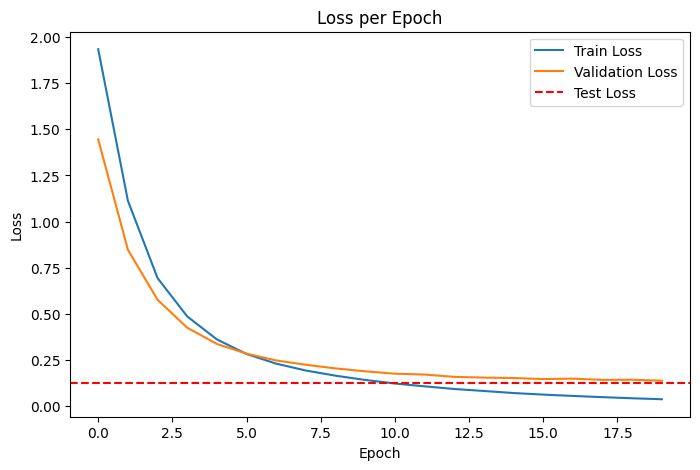

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# ============================
# 1. Load Data
# ============================
train = pd.read_csv("train.csv")

X = train.drop("label", axis=1).values
y = train["label"].values

# Normalize pixels
X = X / 255.0

# One-hot encode labels
y_cat = to_categorical(y, 10)

# ============================
# 2. Split 60:20:20
# ============================
# First split: 60% train, 40% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_cat, test_size=0.4, random_state=42, stratify=y
)

# Second split: 50% of temp → validation, 50% → test (20% each of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1)
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

# ============================
# 3. Build Neural Network
# ============================
model = Sequential([
    Input(shape=(784,)),
    Dense(196, activation='sigmoid'),
    Dense(49, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ============================
# 4. Train Model
# ============================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=128,
    verbose=1
)

# ============================
# 5. Evaluate on Test Set
# ============================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# ============================
# 6. Plot Training/Validation/Test Loss
# ============================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Model Evaluation

• For classification: report accuracy and provide a confusion matrix.

• Compare performance across training, validation, and test sets.

788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Accuracy: 0.9956
Validation Accuracy: 0.9624
Test Accuracy: 0.9652


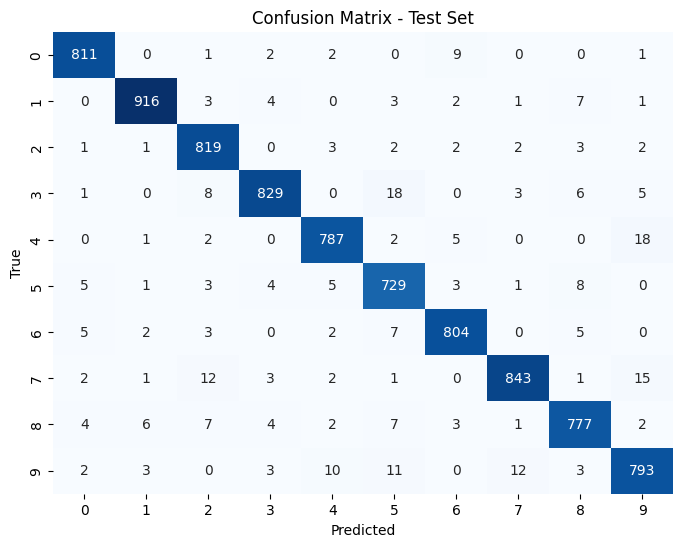

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_val_pred   = np.argmax(model.predict(X_val), axis=1)
y_test_pred  = np.argmax(model.predict(X_test), axis=1)

y_train_true = np.argmax(y_train, axis=1)
y_val_true   = np.argmax(y_val, axis=1)
y_test_true  = np.argmax(y_test, axis=1)

# Compute accuracy
train_acc = accuracy_score(y_train_true, y_train_pred)
val_acc   = accuracy_score(y_val_true, y_val_pred)
test_acc  = accuracy_score(y_test_true, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.show()



Overfitting Analysis

• Does your model show signs of overfitting or underfitting?

Based on outputs, model is neither overfitting nor underfitting.The Loss function is generally between 0.25 and 0 around 20th epoch. Which shows it is not underfitting. The confusion matrix shows that major prediction is correct.

• Discuss evidence from your loss curves and metrics.
Loss curves: decreasing but beyond 0, which shows great performance in model training.
Metrics: The samples are almost assigned correctly, the accuracy is beyond 95 which proved model works well.
Although more layers may gives higher accuracy, the traning efficiency is also considered. So, as a 3 layers model, in my opinion, accuracy above 95% is great for model.

• Suggest potential strategies to reduce overfitting (dropout, regularization, more data, early stopping)
To better reduce overfitting, reduce number of layers is important.I just considered how many layer is suitable, since it's 28*28 pixel picture, it would be better if I trained with 5 layers, where 2*2-pixel layer, 4*4-pixel layer, 7*7 pixel layers 14*14-pixel layer and final 28*28 layers may be used. It is more logical since it is almost 2 times for each layer around 2-4-8-16-32.
However, since the dataset is small compared to CV dataset I used.(It is around 10 GB for zip document). There's no reason that added too much layers which might give incorrect conclusions.Currently, 1st hidden layer has 153,860 parameters, which is above total number of data we had.


Training with learning rate = 0.1

Training with learning rate = 0.01

Training with learning rate = 0.001


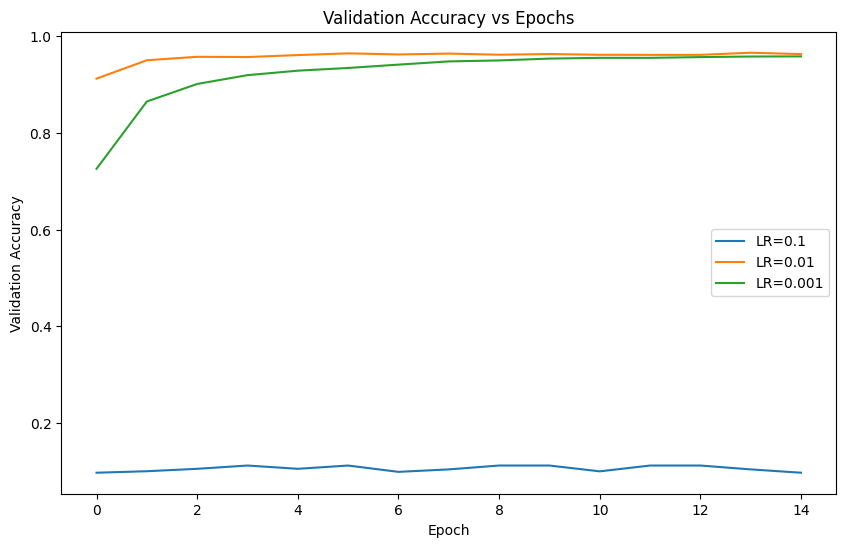

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Learning rates to test
learning_rates = [0.1, 0.01, 0.001]
histories = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    # Build model
    model = Sequential([
        Input(shape=(784,)),
        Dense(196, activation='sigmoid'),
        Dense(49, activation='sigmoid'),
        Dense(16, activation='sigmoid'),
        Dense(10, activation='softmax')
    ])

    # Compile with different learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=15,
                        batch_size=128,
                        verbose=0)

    histories[lr] = history

# ============================
# Plot Training & Validation Accuracy
# ============================
plt.figure(figsize=(10,6))
for lr, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=f"LR={lr}")
plt.title("Validation Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()



Training layers=[196, 49, 20]_lr=0.1

Training layers=[196, 49, 20]_lr=0.01

Training layers=[196, 49, 20]_lr=0.001

Training layers=[128, 64, 32]_lr=0.1

Training layers=[128, 64, 32]_lr=0.01

Training layers=[128, 64, 32]_lr=0.001

Training layers=[256, 128, 64]_lr=0.1

Training layers=[256, 128, 64]_lr=0.01

Training layers=[256, 128, 64]_lr=0.001

Training layers=[196, 49]_lr=0.1

Training layers=[196, 49]_lr=0.01

Training layers=[196, 49]_lr=0.001


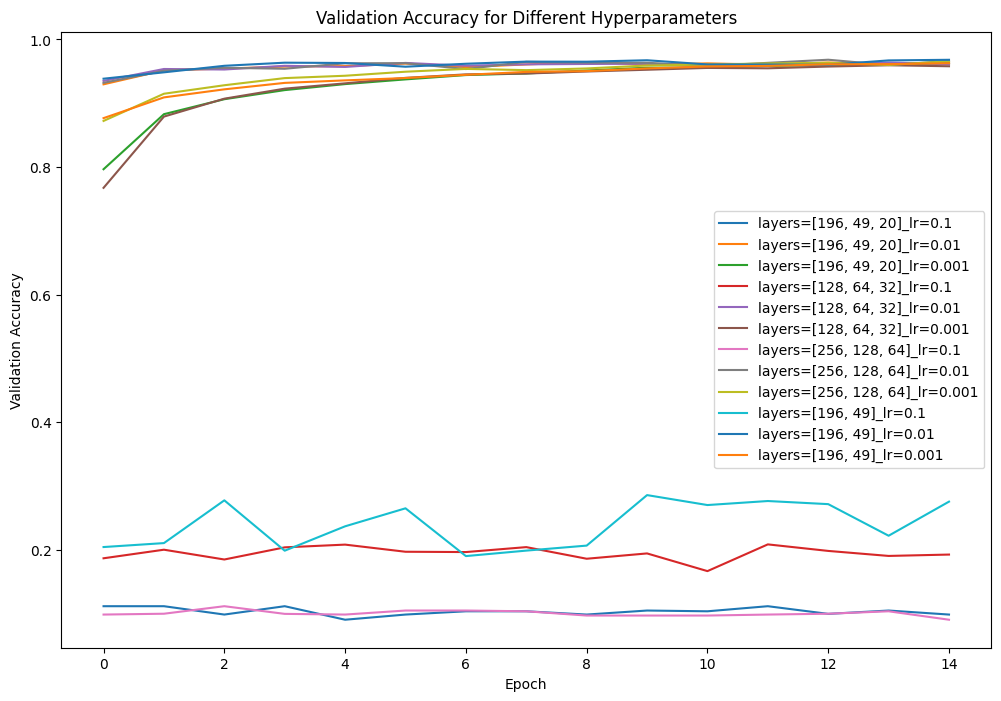

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Hyperparameters to test
learning_rates = [0.1, 0.01, 0.001]

# Different hidden layer configurations
# Each list represents neurons per hidden layer
hidden_configs = [
    [196, 49, 20],   # Original
    [128, 64, 32],   # Smaller
    [256, 128, 64],  # Larger
    [196, 49]        # Fewer layers
]

# Dictionary to store histories
histories = {}

for config in hidden_configs:
    for lr in learning_rates:
        name = f"layers={config}_lr={lr}"
        print(f"\nTraining {name}")

        # Build model
        model = Sequential([Input(shape=(784,))])
        for neurons in config:
            model.add(Dense(neurons, activation='sigmoid'))
        model.add(Dense(10, activation='softmax'))

        # Compile
        model.compile(
            optimizer=Adam(learning_rate=lr),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Train
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=15,
            batch_size=128,
            verbose=0
        )

        histories[name] = history

# ============================
# Plot Validation Accuracy
# ============================
plt.figure(figsize=(12,8))
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)

plt.title("Validation Accuracy for Different Hyperparameters")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


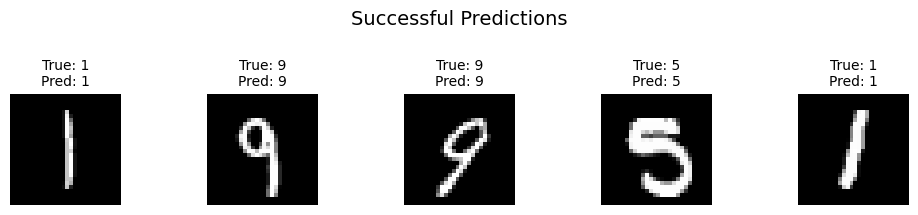

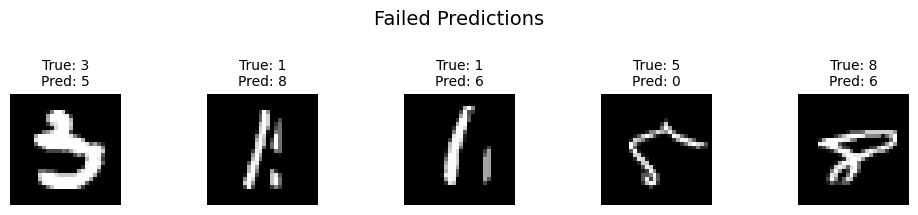

In [ ]:
import matplotlib.pyplot as plt

def plot_images(indices, title, n=5):
    plt.figure(figsize=(n*2, 2))
    for i, idx in enumerate(indices[:n]):
        plt.subplot(1, n, i+1)
        plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}", fontsize=10)
        plt.axis('off')

    plt.suptitle(title, fontsize=14, y=1.05)  # move suptitle above
    plt.tight_layout()  # adjusts subplot positions
    plt.show()

# Example usage
plot_images(correct_idx, "Successful Predictions", n=5)
plot_images(incorrect_idx, "Failed Predictions", n=5)
